### translation with numpy
#### translated_array = translation_matrix @ array

In [1]:
import numpy as np

In [2]:
arr = np.array([[2,0,1],
                [3,0,2],
                [1,1,1]])

In [3]:
print(arr)

[[2 0 1]
 [3 0 2]
 [1 1 1]]


In [6]:
arr_tr = np.array([[2 + 2, 0 + 2, 1 + 2],  # translation by manual calculation
                   [3 + 3, 0 + 3, 2 + 3],
                   [1, 1, 1]])

In [5]:
print(arr_tr)

[[4 2 3]
 [6 3 5]
 [1 1 1]]


In [7]:
a = 2  # translation in x dir
b = 3  # translation in y dir

In [8]:
M = np.array([[1,0,a],[0,1,b],[0,0,1]])  # translation matrix

In [9]:
print(M)

[[1 0 2]
 [0 1 3]
 [0 0 1]]


In [10]:
arr_tr_M = M@arr  # translation by numpy

In [11]:
print(arr_tr_M)

[[4 2 3]
 [6 3 5]
 [1 1 1]]


### rotation with opencv
#### rotation matrix: cv2.getRotationMatrix2D

### resize with opencv
#### cv2.resize(src, dsize, fx, fy, interpolation), interpolation:
#### image shrinking - bilinear interpolation: cv2.INTER_AREA
#### image size increasing - linear interpolation: cv2.INTER_LINEAR or cubic interpolation: cv2.INTER_CUBIC

### affine transformation with opencv
#### M = cv2.getAffineTransform(Input, Output)
#### cv2.warpAffine(src, M, dsize)

In [16]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
img = cv2.imread('drip.jpg')  # load image

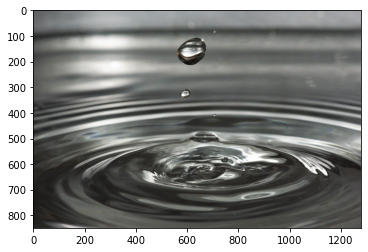

In [19]:
plt.imshow(img[:,:,::-1])  # show image
plt.show()

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert image to grayscale

In [21]:
height, width = img.shape

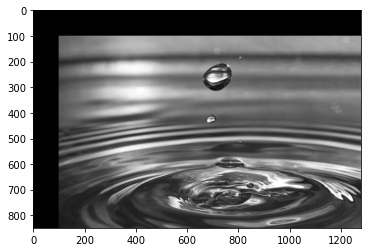

In [24]:
# translation

tx = 100
ty = 100
M = np.float32([[1,0,tx],[0,1,ty]])
tr_img = cv2.warpAffine(img, M, (width, height))
plt.imshow(tr_img, cmap="gray")
plt.show()

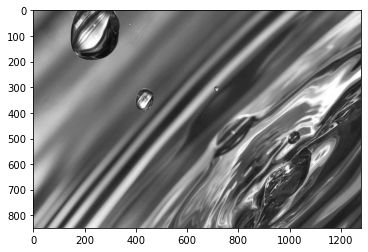

In [25]:
# rotation

angle = 45
center = (width//2, height//2)
scale = 2
M = cv2.getRotationMatrix2D(center, angle, scale)
rot_img = cv2.warpAffine(img, M, (width,height))
plt.imshow(rot_img, cmap="gray")
plt.show()

In [27]:
# resize

print("Width of the image = {}, Height of the image = {}" .format(width, height))
res_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
res_height, res_width = res_img.shape
print("Width of the image = {}, Height of the image = {}" .format(res_width, res_height))

Width of the image = 1280, Height of the image = 849
Width of the image = 2560, Height of the image = 1698


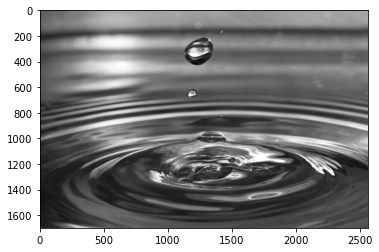

In [28]:
plt.imshow(res_img, cmap="gray")
plt.show()

### perspective transformation with opencv
#### M = cv2.getPerspectiveTransform(Input, Output)
#### cv2.warpPerspective(src, M, (Output_width, Output_height))

In [31]:
img2 = cv2.imread('book.jpg')

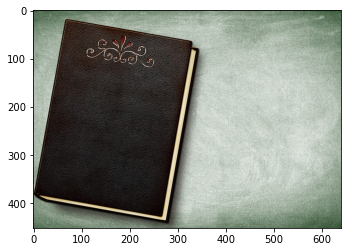

In [32]:
plt.imshow(img2[:,:,::-1])
plt.show()

In [34]:
input_pts = np.float32([[4,381],
                        [266,429],
                        [329,68],
                        [68,20]])
output_pts = np.float32([[0,300],
                         [300,300],
                         [300,0],
                         [0,0]])

In [35]:
M = cv2.getPerspectiveTransform(input_pts,output_pts)

In [36]:
pt_img = cv2.warpPerspective(img2,M,(300,300))

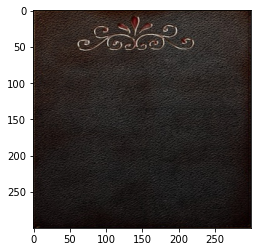

In [37]:
plt.imshow(pt_img[:,:,::-1])
plt.show()

### image addition
#### cv2.add(img1, img2)
#### img1 + img2

In [38]:
img3 = cv2.imread('puppy.jpg')

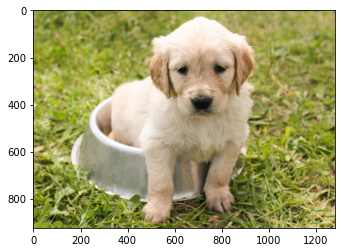

In [40]:
plt.imshow(img3[:,:,::-1])
plt.show()

In [43]:
numpy_img3 = img3 + 100  # numpy approach - not recommended

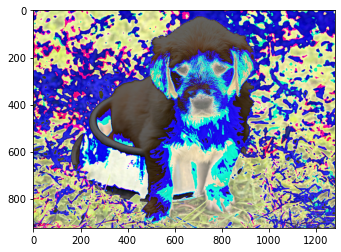

In [42]:
plt.imshow(numpy_img3[:,:,::-1])
plt.show()

In [44]:
cv_img3 = cv2.add(img3,100)  # opencv approach

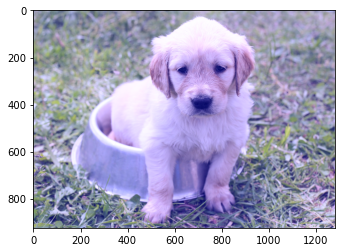

In [45]:
plt.imshow(cv_img3[:,:,::-1])
plt.show()  # added 100 only to blue channel

In [46]:
img3.shape

(924, 1280, 3)

In [47]:
np_arr = np.ones((924,1280,3), dtype=np.uint8) * 100

In [48]:
cv2_img3 = cv2.add(img3,np_arr)

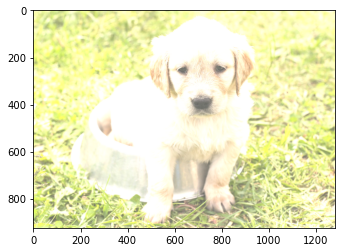

In [49]:
plt.imshow(cv2_img3[:,:,::-1])
plt.show()

In [50]:
numpy2_img3 = img3 + np_arr

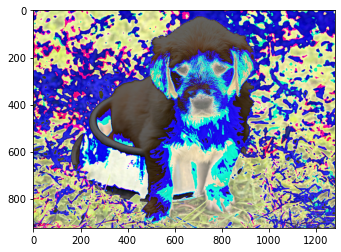

In [51]:
plt.imshow(numpy2_img3[:,:,::-1])
plt.show()

### image multiplication
#### cv2.Mul(img1, img2)

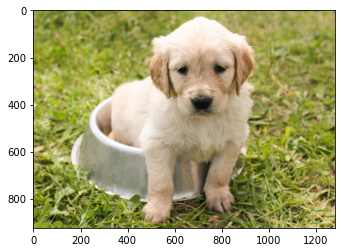

In [52]:
plt.imshow(img3[:,:,::-1])
plt.show()

In [57]:
cv_mult = cv2.multiply(img3,2)

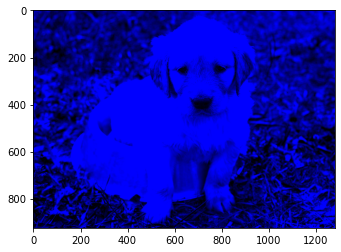

In [58]:
plt.imshow(cv_mult[:,:,::-1])
plt.show()

In [59]:
np_mult = img3 * 2

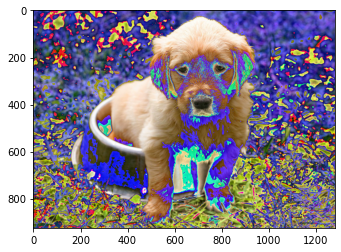

In [60]:
plt.imshow(np_mult[:,:,::-1])
plt.show()

In [62]:
img3.shape

(924, 1280, 3)

In [63]:
np_arr2 = np.ones((924,1280,3), dtype=np.uint8) * 2

In [64]:
cv_mult2 = cv2.multiply(img3,np_arr2)

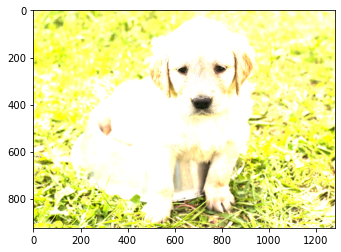

In [65]:
plt.imshow(cv_mult2[:,:,::-1])
plt.show()